### **Scharr算子**

* Sobel算子对图像中较弱的边缘提取效果较差，而Scharr算子可以将滤波器中权重系数放大以增大灰度值的差异

* Scharr在x方向的边缘检测算子为$$G_x = \begin{bmatrix} -3 & 0 & 3\\ -10 & 0 & 10\\ -3 & 0 & 3\end{bmatrix}$$
* Scharr在y方向的边缘检测算子为$$G_y = \begin{bmatrix} -3 & -10 & -3\\ 0 & 0 & 0\\ 3 & 10 & 3\end{bmatrix}$$

* Scharr算子默认的滤波器大小为3 × 3，而且无法修改

In [11]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [12]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'equalLena.png', cv.IMREAD_ANYCOLOR)
if img is None:
    print('Failed to read equalLena.png')
    sys.exit

In [13]:
# 为了更好地展现边缘提取，此处定义函数使图像反向
def image_invert(img):
    h, w = img.shape[:2]  # 图片的高度和宽度
    imgInv = np.empty((w, h), np.uint8)  # 创建空白数组
    for i in range(h):
        for j in range(w):
            imgInv[i][j] = 255 - img[i][j]
    return imgInv

In [14]:
# x方向的一阶边缘
result_X = cv.Scharr(img, cv.CV_16S, 1, 0)
result_X = cv.convertScaleAbs(result_X)
result_X = image_invert(result_X)
# y方向的一阶边缘
result_Y = cv.Scharr(img, cv.CV_16S, 0, 1)
result_Y = cv.convertScaleAbs(result_Y)
result_Y = image_invert(result_Y)
# 整幅图像的一阶边缘
result_XY = result_X + result_Y

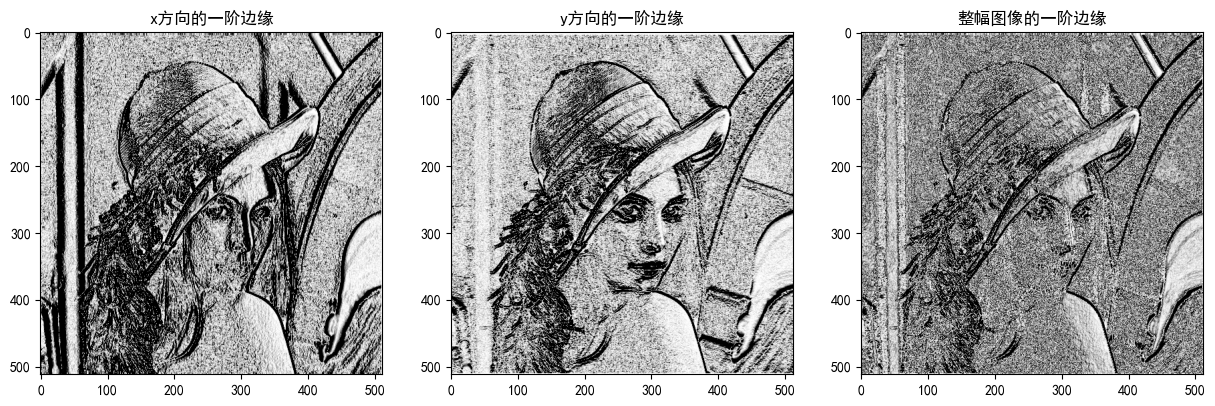

In [15]:
# 展示结果
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('x方向的一阶边缘')
plt.imshow(result_X, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('y方向的一阶边缘')
plt.imshow(result_Y, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('整幅图像的一阶边缘')
plt.imshow(result_XY, cmap='gray')

通过结果可看出，Scharr算子比Sobel算子提取到更“微弱”的边缘